In [2]:
import pprint
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


matchup_data = pd.read_csv("data/matchup_data.csv")

x_data = matchup_data[['diff_assists', 'diff_denies', 'diff_first_blood', 'diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_match_duration', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
y_data = matchup_data.radiant_winner

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.33, random_state = 14)
rf = RandomForestClassifier(n_estimators=1000,max_features='auto',random_state=0)
rf.fit(x_train, y_train)
prediction = dict()
prediction['RandomForest'] = rf.predict(x_test)

print(f"log loss = {log_loss(y_test, rf.predict_proba(x_test)[:, 1])}")
print(f"accuracy = {rf.score(x_test, y_test)}")



log loss = 0.7098544320124964
accuracy = 0.6319444444444444


In [3]:
rf.score(x_test , y_test)

0.6319444444444444

In [4]:
conf_mat_logist = confusion_matrix(y_test, prediction['RandomForest'])


In [5]:
conf_mat_logist

array([[46, 29],
       [24, 45]])

In [6]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [7]:
cv_results = cross_validate(rf, x_data, y_data,cv=3,scoring='accuracy')
sorted(cv_results.keys())
cv_results['test_score']

array([0.62328767, 0.59310345, 0.58333333])

In [8]:
cv_scores = cross_val_score(rf, x_test, y_test,cv=3,scoring='accuracy')

In [9]:
cv_scores

array([0.60416667, 0.54166667, 0.64583333])

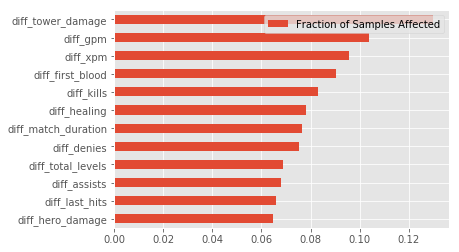

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=x_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')